# KMEANS

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [4]:
sns = pd.read_csv('snsdata.csv')

In [5]:
sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [6]:
sns.shape

(30000, 40)

In [7]:
# This ds is mostly teenage of customers.
# Marketing Agency wants to target customers based on age and hoobies.

# Create the kmeans cluster and group the people based on similarity and find the number of clustering.

In [8]:
sns.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [9]:
sns.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [10]:
sns.gender = sns.gender.fillna('F')

In [11]:
sns.age = sns.age.fillna(sns.age.mean())

In [12]:
sns.gender = sns.gender.replace({'M':0, 'F':1})

In [13]:
sns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  int64  
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [14]:
sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,1,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,0,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,1,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,1,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [15]:
# since its unsupervised no sampling needed.

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans_sns = KMeans(n_clusters=3)

In [18]:
kmeans_sns.fit(sns)

KMeans(n_clusters=3)

In [19]:
kmeans_sns.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [20]:
list1 = list(kmeans_sns.labels_)

In [21]:
print(list1.count(0))
print(list1.count(1))
print(list1.count(2))

8508
20164
1328


In [22]:
# we have givven k = 3 so 3 clusters with 1 centroid each and each centroid will have 40 coordinates(as there are 40 cols in sns data)
kmeans_sns.cluster_centers_

array([[2.00757605e+03, 8.53549600e-01, 1.79350145e+01, 5.73368594e+01,
        3.13704748e-01, 2.82087447e-01, 2.60695816e-01, 2.20733427e-01,
        1.77362482e-01, 1.55383169e-01, 1.24706159e-01, 1.19417019e-01,
        9.48519041e-02, 1.55500705e-01, 3.80112835e-01, 2.10037612e-01,
        1.53737659e-01, 1.42924307e-01, 1.11189469e-01, 4.96826516e-01,
        3.33333333e-01, 4.87776211e-02, 7.76680771e-01, 2.68335684e-01,
        5.37611660e-01, 3.06770099e-01, 1.39868359e-01, 2.28020686e-02,
        4.48401504e-01, 1.30230371e-01, 1.35637047e-01, 2.99952985e-01,
        4.23483780e-01, 1.61612600e-01, 9.07381288e-02, 6.55853315e-02,
        1.92054537e-01, 1.29877762e-01, 9.03855195e-02, 6.00611189e-02],
       [2.00745551e+03, 8.08768102e-01, 1.80332329e+01, 1.11776929e+01,
        2.40527673e-01, 2.37304106e-01, 2.05415592e-01, 1.29934537e-01,
        1.24380083e-01, 1.24231303e-01, 9.29875025e-02, 9.67070026e-02,
        8.34655822e-02, 1.33306884e-01, 2.88881174e-01, 2.07895

In [23]:
# pd.DataFrame(kmeans_sns.cluster_centers_)

In [24]:
kmeans_sns.score(sns) ##ssd for value of k = 3
# its in -ve Kind of Error 
# and it wants to indicate that ssd can be reduced and while biulding ssd plot take absolute value.

-11298651.29969352

In [25]:
# to get the elbow plot we will run this model for multiple values of k:
ssd_sns = []
for i in range(1,10):
    kmeans_sns = KMeans(n_clusters=i)
    kmeans_sns.fit(sns)
    score_sns = kmeans_sns.score(sns)
    ssd_sns.append(score_sns)
ssd_sns    

[-42274974.9228341,
 -18611357.271640565,
 -11294254.152967643,
 -8109653.251079646,
 -6331420.107963148,
 -5050347.1309783505,
 -4002334.868971926,
 -3101446.8696073643,
 -2567358.8605705015]

In [26]:
import numpy as np

In [27]:
ssd_sns = np.round(np.abs(ssd_sns))
ssd_sns

array([42274975., 18611357., 11294254.,  8109653.,  6331420.,  5050347.,
        4002335.,  3101447.,  2567359.])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

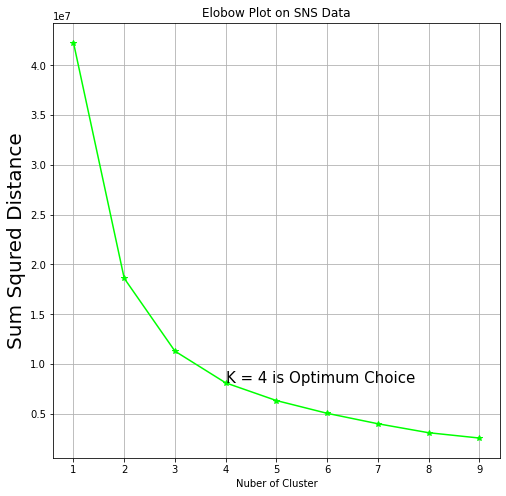

In [28]:
number = [1,2,3,4,5,6,7,8,9]

plt.figure(figsize = (8,8))
# number = [1,2,3,4,5,6,7,8,9,10]
plt.plot(number, ssd_sns, marker = "*", color = 'lime')
plt.title("Elobow Plot on SNS Data")
plt.xlabel('Nuber of Cluster')
plt.ylabel('Sum Squred Distance', size = 20)
plt.text(x = 4,y=8109653, s = 'K = 4 is Optimum Choice', size = 15)
plt.grid()

In [29]:
(42274975 - 18611357) * 100 / 42274975 # %  drop from 1st to 2nd

55.9754748524393

In [30]:
(18611357 - 11298651) * 100 / 18611357  # %  drop from 2nd to 3rd

39.29163252308792

# Now lets Create the Final Model with value of k as 4

In [31]:
kmeans_sns = KMeans(n_clusters=4)
kmeans_sns.fit(sns)

KMeans(n_clusters=4)

In [32]:
df_with_centers = pd.DataFrame(kmeans_sns.cluster_centers_)

In [33]:
df_with_centers.columns = sns.columns

In [34]:
df_with_centers # Each Row is One Cluster with 40 co-ordinates.

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.440776,0.807271,18.098456,7.279673,0.228173,0.232293,0.197576,0.122024,0.114814,0.119721,0.088761,0.094941,0.082823,0.129476,0.275432,0.208603,0.130991,0.109240,0.096092,0.373463,0.278703,0.035504,0.696456,0.225932,0.413875,0.206665,0.094820,0.019449,0.397395,0.096334,0.081309,0.222296,0.302575,0.136262,0.054408,0.040230,0.179521,0.102757,0.083490,0.063556
1,2007.534645,0.833035,17.846935,38.880420,0.304426,0.272910,0.242959,0.194680,0.172105,0.150201,0.112204,0.110080,0.091082,0.156460,0.359410,0.222061,0.143608,0.140143,0.111533,0.470720,0.335829,0.048949,0.801967,0.270563,0.502123,0.276151,0.125279,0.022128,0.441775,0.125503,0.124050,0.276710,0.389584,0.162271,0.079906,0.056214,0.194122,0.129526,0.089629,0.057555
2,2007.773770,0.927869,17.635228,180.585246,0.418033,0.308197,0.249180,0.244262,0.227869,0.163934,0.195082,0.113115,0.113115,0.136066,0.526230,0.247541,0.200000,0.206557,0.136066,0.613115,0.313115,0.049180,0.839344,0.236066,0.662295,0.319672,0.121311,0.016393,0.573770,0.186885,0.136066,0.422951,0.527869,0.188525,0.145902,0.121311,0.206557,0.140984,0.121311,0.060656
3,2007.627127,0.872238,17.945546,83.102362,0.323851,0.280671,0.278385,0.236474,0.182880,0.155448,0.155194,0.133858,0.093726,0.147066,0.407163,0.178054,0.169418,0.156210,0.108966,0.509271,0.302769,0.041656,0.749809,0.255525,0.566675,0.347473,0.152908,0.028194,0.461011,0.127508,0.109982,0.334773,0.454153,0.162306,0.100076,0.074676,0.177038,0.123444,0.097790,0.053848


In [35]:
final_df = pd.concat([sns, pd.Series(kmeans_sns.labels_)], axis=1)

In [36]:
final_df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,0
0,2006,0,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,1,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0
2,2006,0,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
3,2006,1,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,1,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0


In [37]:
final_df.shape

(30000, 41)

In [38]:
final_df.rename(columns={final_df.columns[-1]:'Labels'}, inplace=True)

In [39]:
final_df.head(2)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Labels
0,2006,0,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,1,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0


In [40]:
final_df = final_df.sort_values('Labels')

In [41]:
final_df.tail(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Labels
8246,2007,1,17.67800,83,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
22531,2009,0,15.59800,68,0,0,0,0,0,0,0,12,0,0,0,3,1,1,3,1,1,0,1,0,0,0,0,0,2,1,0,0,0,1,0,0,1,0,0,1,3
26377,2009,1,15.20100,62,0,0,0,0,1,1,0,0,1,2,2,1,0,1,0,0,3,0,18,2,1,1,0,1,1,0,1,1,3,3,1,0,3,0,0,0,3
14343,2007,1,17.99395,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
18623,2008,0,16.70100,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,2,0,1,2,3
14352,2007,1,17.10600,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
18613,2008,1,17.09000,110,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3850,2006,1,19.50700,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
18611,2008,1,17.04600,86,0,4,0,0,11,0,0,0,1,0,0,0,0,2,0,2,0,0,1,1,0,0,0,0,0,1,0,0,2,0,3,2,0,0,0,0,3
7662,2007,1,17.75200,81,3,1,0,0,0,0,0,1,0,0,2,0,0,0,0,1,2,0,1,0,1,5,2,0,2,0,1,0,3,0,1,1,0,1,0,0,3


# DBSCAN

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [43]:
scaler = StandardScaler()

In [44]:
scaled_sn1 = scaler.fit_transform(sns)

In [46]:
scaled_sn1

(30000, 40)

In [47]:
df1 = pd.DataFrame(scaled_sn1)

In [48]:
df1.iloc[:,1].mean()

-2.6378973079962028e-15

In [49]:
df1.iloc[:,1].std()

1.0000166670835247

# Now we will Normalize it

In [57]:
scaled_sn1 = normalize(scaled_sn1)

In [58]:
dbscan = DBSCAN(eps=0.6, min_samples=7) #eps dist min distance min_samples = 7
model_db = dbscan.fit(scaled_sn1) # model has been created

In [74]:
# Decrease the distance Noise point and Cluster will Increase 

In [81]:
dbscan = DBSCAN(eps=0.8, min_samples=7) #eps dist min distance min_samples = 7
model_db = dbscan.fit(scaled_sn1)

In [82]:
model_db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
list3 = list(model_db.labels_)

In [84]:
np.unique(list3) #-1 is noise

array([-1,  0], dtype=int64)

In [85]:
list3.count(-1)

198

In [79]:
list3.count(0)

15

In [80]:
list3.count(1)

597

In [73]:
list3.count(2)

21